### Results
- it does not seem that depth is a factor in the antenna response calculation in NuRadioMC
    - from `antennapattern.py`:
        - `def get_antenna_response_vectorized(self, freq, zenith, azimuth, orientation_theta, orientation_phi, rotation_theta, rotation_phi):`
        - antenna response is only calculated based on the direction of the signal and the orientation of the antenna

- get on tuesday morning call - Philip and Kaeli
- other station data
- ask Sany or Eric about which holes they used
- look at VPol low freq early peak

In [1]:
""" Adapted from from NuRadioMC/NuRadioReco/examples/StandAloneScripts/A01plot_antenna_response.py """

import NuRadioReco.detector.antennapattern
import matplotlib.pyplot as plt
from NuRadioReco.utilities import units
import numpy as np

In [6]:
provider = NuRadioReco.detector.antennapattern.AntennaPatternProvider()

# theta = 90 * units.deg  # does not appear to be used in the calculation
ff = np.linspace(50 * units.MHz, 1 * units.GHz, 1000)

RNOG_vpol_4in_center_n1_73 = provider.load_antenna_pattern("RNOG_vpol_4inch_center_n1.73")
RNOG_vpol_4in_half_n1_73 = provider.load_antenna_pattern("RNOG_vpol_4inch_half_n1.73")
RNOG_vpol_4in_wall_n1_73 = provider.load_antenna_pattern("RNOG_vpol_4inch_wall_n1.73")

RNOG_vpol_3_5in_center_n1_74 = provider.load_antenna_pattern("RNOG_vpol_v3_5inch_center_n1.74")
RNOG_hpol_v4_8inch_center_n1_74 = provider.load_antenna_pattern("RNOG_hpol_v4_8inch_center_n1.74")
# RNOG_quadslot_v1_n1_74 = provider.load_antenna_pattern("RNOG_quadslot_v1_n1.74")
# RNOG_quadslot_v2_n1_74 = provider.load_antenna_pattern("RNOG_quadslot_v2_n1.74")
RNOG_quadslot_v2_rescaled_fineFreq = provider.load_antenna_pattern("RNOG_quadslot_v2_rescaled_fineFreq")

# put the antennas in an array for easy looping with their labels
antennas = [
    (RNOG_vpol_4in_center_n1_73, "RNOG vpol 4in center n=1.73"),
    (RNOG_vpol_4in_half_n1_73, "RNOG vpol 4in half n=1.73"),
    (RNOG_vpol_4in_wall_n1_73, "RNOG vpol 4in wall n=1.73"),
    (RNOG_vpol_3_5in_center_n1_74, "RNOG vpol 3.5in center n=1.74"),
    (RNOG_hpol_v4_8inch_center_n1_74, "RNOG hpol v4.8in center n=1.74"),
    # (RNOG_quadslot_v1_n1_74, "RNOG quadslot v1 n=1.74"),
    # (RNOG_quadslot_v2_n1_74, "RNOG quadslot v2 n=1.74"),
    (RNOG_quadslot_v2_rescaled_fineFreq, "RNOG quadslot v2 rescaled fineFreq")
]

# freq : float or array of floats
    # frequency
# zenith : float
    # zenith angle of incoming signal direction
# azimuth : float
    # azimuth angle of incoming signal direction
# orientation_theta: float
    # orientation of the antenna, as a zenith angle (0deg is the zenith, 180deg is straight down); for LPDA: outward along boresight; for dipoles: upward along axis of azimuthal symmetry
# orientation_phi: float
    # orientation of the antenna, as an azimuth angle (counting from East counterclockwise); for LPDA: outward along boresight; for dipoles: upward along axis of azimuthal symmetry
# rotation_theta: float
    # rotation of the antenna, is perpendicular to 'orientation', for LPDAs: vector perpendicular to the plane containing the the tines
# rotation_phi: float
    # rotation of the antenna, is perpendicular to 'orientation', for LPDAs: vector perpendicular to the plane containing the the tines

VELS_dict = {}
for antenna, label in antennas:
    VELS = antenna.get_antenna_response_vectorized(
        ff,  # frequency
        90 * units.deg,  # zenith - the signal comes from horizontal
        np.deg2rad(0),  # azimuth - the signal comes from East
        np.deg2rad(180),  # orientation theta - the antenna is oriented down
        0,  # orientation phi - the antenna is oriented down
        np.deg2rad(90),  # rotation theta - the antenna is rotated 90 degrees from the East
        np.deg2rad(0)  # rotation phi - the antenna is not rotated in the azimuthal plane
    )
    VELS_dict[label] = VELS

STATUS - 2025-08-25 15:40:10,153 - NuRadioReco.antennapattern - loading antenna file RNOG_vpol_4inch_center_n1.73 took 0 seconds
STATUS - 2025-08-25 15:40:10,232 - NuRadioReco.antennapattern - loading antenna file RNOG_vpol_4inch_half_n1.73 took 0 seconds
STATUS - 2025-08-25 15:40:10,308 - NuRadioReco.antennapattern - loading antenna file RNOG_vpol_4inch_wall_n1.73 took 0 seconds
STATUS - 2025-08-25 15:40:15,533 - NuRadioReco.antennapattern - loading antenna file RNOG_vpol_v3_5inch_center_n1.74 took 5 seconds
STATUS - 2025-08-25 15:40:15,849 - NuRadioReco.antennapattern - loading antenna file RNOG_hpol_v4_8inch_center_n1.74 took 0 seconds
WARNING - 2025-08-25 15:40:15,884 - NuRadioReco.antennapattern - no hash sum of RNOG_quadslot_v2_rescaled_fineFreq.pkl available, skipping up-to-date check
STATUS - 2025-08-25 15:40:16,216 - NuRadioReco.antennapattern - loading antenna file RNOG_quadslot_v2_rescaled_fineFreq took 0 seconds


In [7]:
# save VELS_dict to a file
import pickle
with open('NuRadio_VELS_dict.pkl', 'wb') as f:
    pickle.dump(VELS_dict, f)

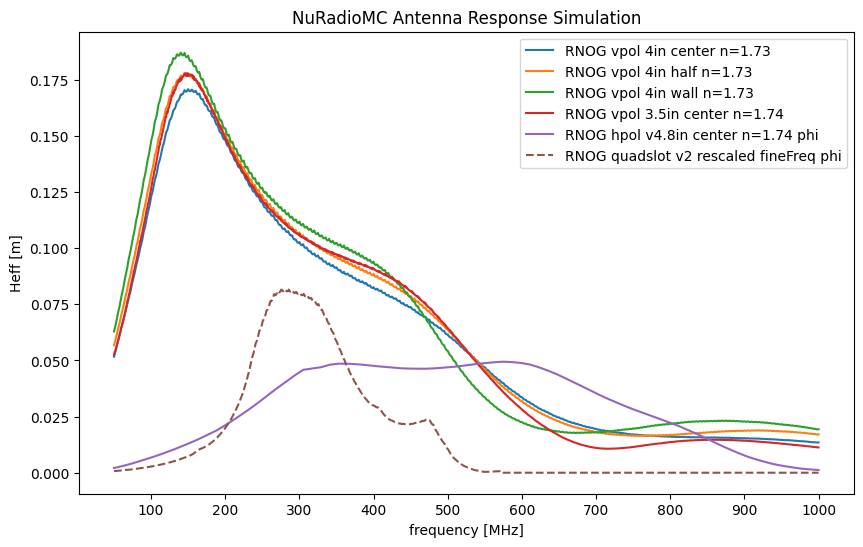

In [10]:
# plot the results
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(10, 6))
for label, VELS in VELS_dict.items():
    if 'RNOG hpol v4.8in center n=1.74' in label or 'quadslot' in label:
        continue  # skip the hpol phi for now
    ax.plot(ff / units.MHz, np.abs(VELS['theta']), label=label)
    # ax.plot(ff / units.MHz, np.abs(VELS['phi']), label=label + ' phi')
# plot the hpol phi
ax.plot(ff / units.MHz, np.abs(VELS_dict['RNOG hpol v4.8in center n=1.74']['phi']), label='RNOG hpol v4.8in center n=1.74 phi')

ax.plot(ff / units.MHz, np.abs(VELS_dict['RNOG quadslot v2 rescaled fineFreq']['phi']), label='RNOG quadslot v2 rescaled fineFreq phi', linestyle='--')

# ax.set_title('NS ant down, signal from East at 90deg')
ax.set_title("NuRadioMC Antenna Response Simulation")
ax.legend()
ax.set_ylabel("Heff [m]")
ax.set_xlabel("frequency [MHz]")
# draw ticks every 100 MHz
ax.xaxis.set_major_locator(plt.MultipleLocator(100))

# plt.show()
plt.savefig('NuRadioMC_antenna_response.png', dpi=300, bbox_inches='tight')

In [6]:
# plot just the RNOG hpol v4.8in center n=1.74 theta
plt.figure(figsize=(10, 6))
plt.plot(ff / units.MHz, np.abs(VELS_dict['RNOG hpol v4.8in center n=1.74']['']), label='RNOG hpol v4.8in center n=1.74')
plt.title('RNOG hpol v4.8in center n=1.74 theta response')
plt.xlabel('Frequency [MHz]')

KeyError: ''

<Figure size 1000x600 with 0 Axes>